# Task 3 Traffic Sign Classification / Recognition System

## Loading files

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df = pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')
df_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

In [3]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
#Contains Path to each image directory
#Class id is the target variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [6]:
df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [7]:
#Path is type of object , need to convert it to string for accessing images through it.

In [8]:
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [9]:
df_test.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [10]:
meta = pd.read_csv('../input/gtsrb-german-traffic-sign/Meta.csv')

In [11]:
meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


## Building model

In [12]:
import keras 
from matplotlib import pyplot as plt
from keras.applications import Xception

In [13]:
model = keras.models.Sequential([
    Xception(include_top=False, weights=None, input_shape=(299, 299, 3), pooling='avg'),
    keras.layers.Dense(43),
    keras.layers.Softmax()]
    )
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
# model = Sequential()
# model.add(Xception(include_top=False, weights=None, input_shape=(299, 299, 3), pooling='avg'))
# model.add(Dense(43))
# model.add(Softmax())
# model.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 43)                88107     
_________________________________________________________________
softmax (Softmax)            (None, 43)                0         
Total params: 20,949,587
Trainable params: 20,895,059
Non-trainable params: 54,528
_________________________________________________________________


## Preparing data for model training

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


20 Train/20/00020_00000_00020.png


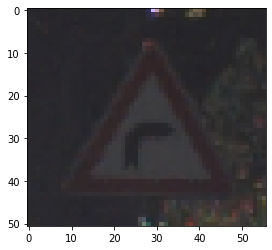

In [15]:
df['ClassId'] = df['ClassId'].astype(str)
df_test['ClassId'] = df_test['ClassId'].astype(str)
for i in range(0, len(df['ClassId'])):
    if len(df['ClassId'][i]) == 1:
        df['ClassId'][i] = '0' + df['ClassId'][i]
for i in range(0, len(df_test['ClassId'])):
    if len(df_test['ClassId'][i]) == 1:
        df_test['ClassId'][i] = '0' + df['ClassId'][i]

print(df['ClassId'][20], df['Path'][20])
img = Image.open('../input/gtsrb-german-traffic-sign/' + df['Path'][20])
plt.imshow(img)

In [16]:
gen_train = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,shear_range=0.2)
gen_test = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
generator_train = gen_train.flow_from_dataframe(dataframe=df,
                                                directory='../input/gtsrb-german-traffic-sign/',
                                                target_size=(299, 299),
                                                x_col='Path',
                                                y_col='ClassId',
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 39209 validated image filenames belonging to 43 classes.


In [17]:
generator_test = gen_test.flow_from_dataframe(dataframe=df_test,
                                            directory='../input/gtsrb-german-traffic-sign/',
                                            x_col='Path',
                                            y_col='ClassId',
                                            target_size=(299, 299),
                                            batch_size=16,
                                            class_mode='categorical'
                                            )

Found 12630 validated image filenames belonging to 43 classes.


## Training model

In [18]:
history = model.fit(generator_train, epochs=2, verbose=1)

Epoch 1/2
1226/1226 [==============================] - 1297s 1s/step - loss: 1.8494 - accuracy: 0.4800
Epoch 2/2
1226/1226 [==============================] - 1157s 943ms/step - loss: 0.0519 - accuracy: 0.9838


In [19]:
model.evaluate(generator_test, verbose=1)

790/790 [==============================] - 88s 109ms/step - loss: 5.9654 - accuracy: 0.6294


[5.965394496917725, 0.6293745040893555]

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


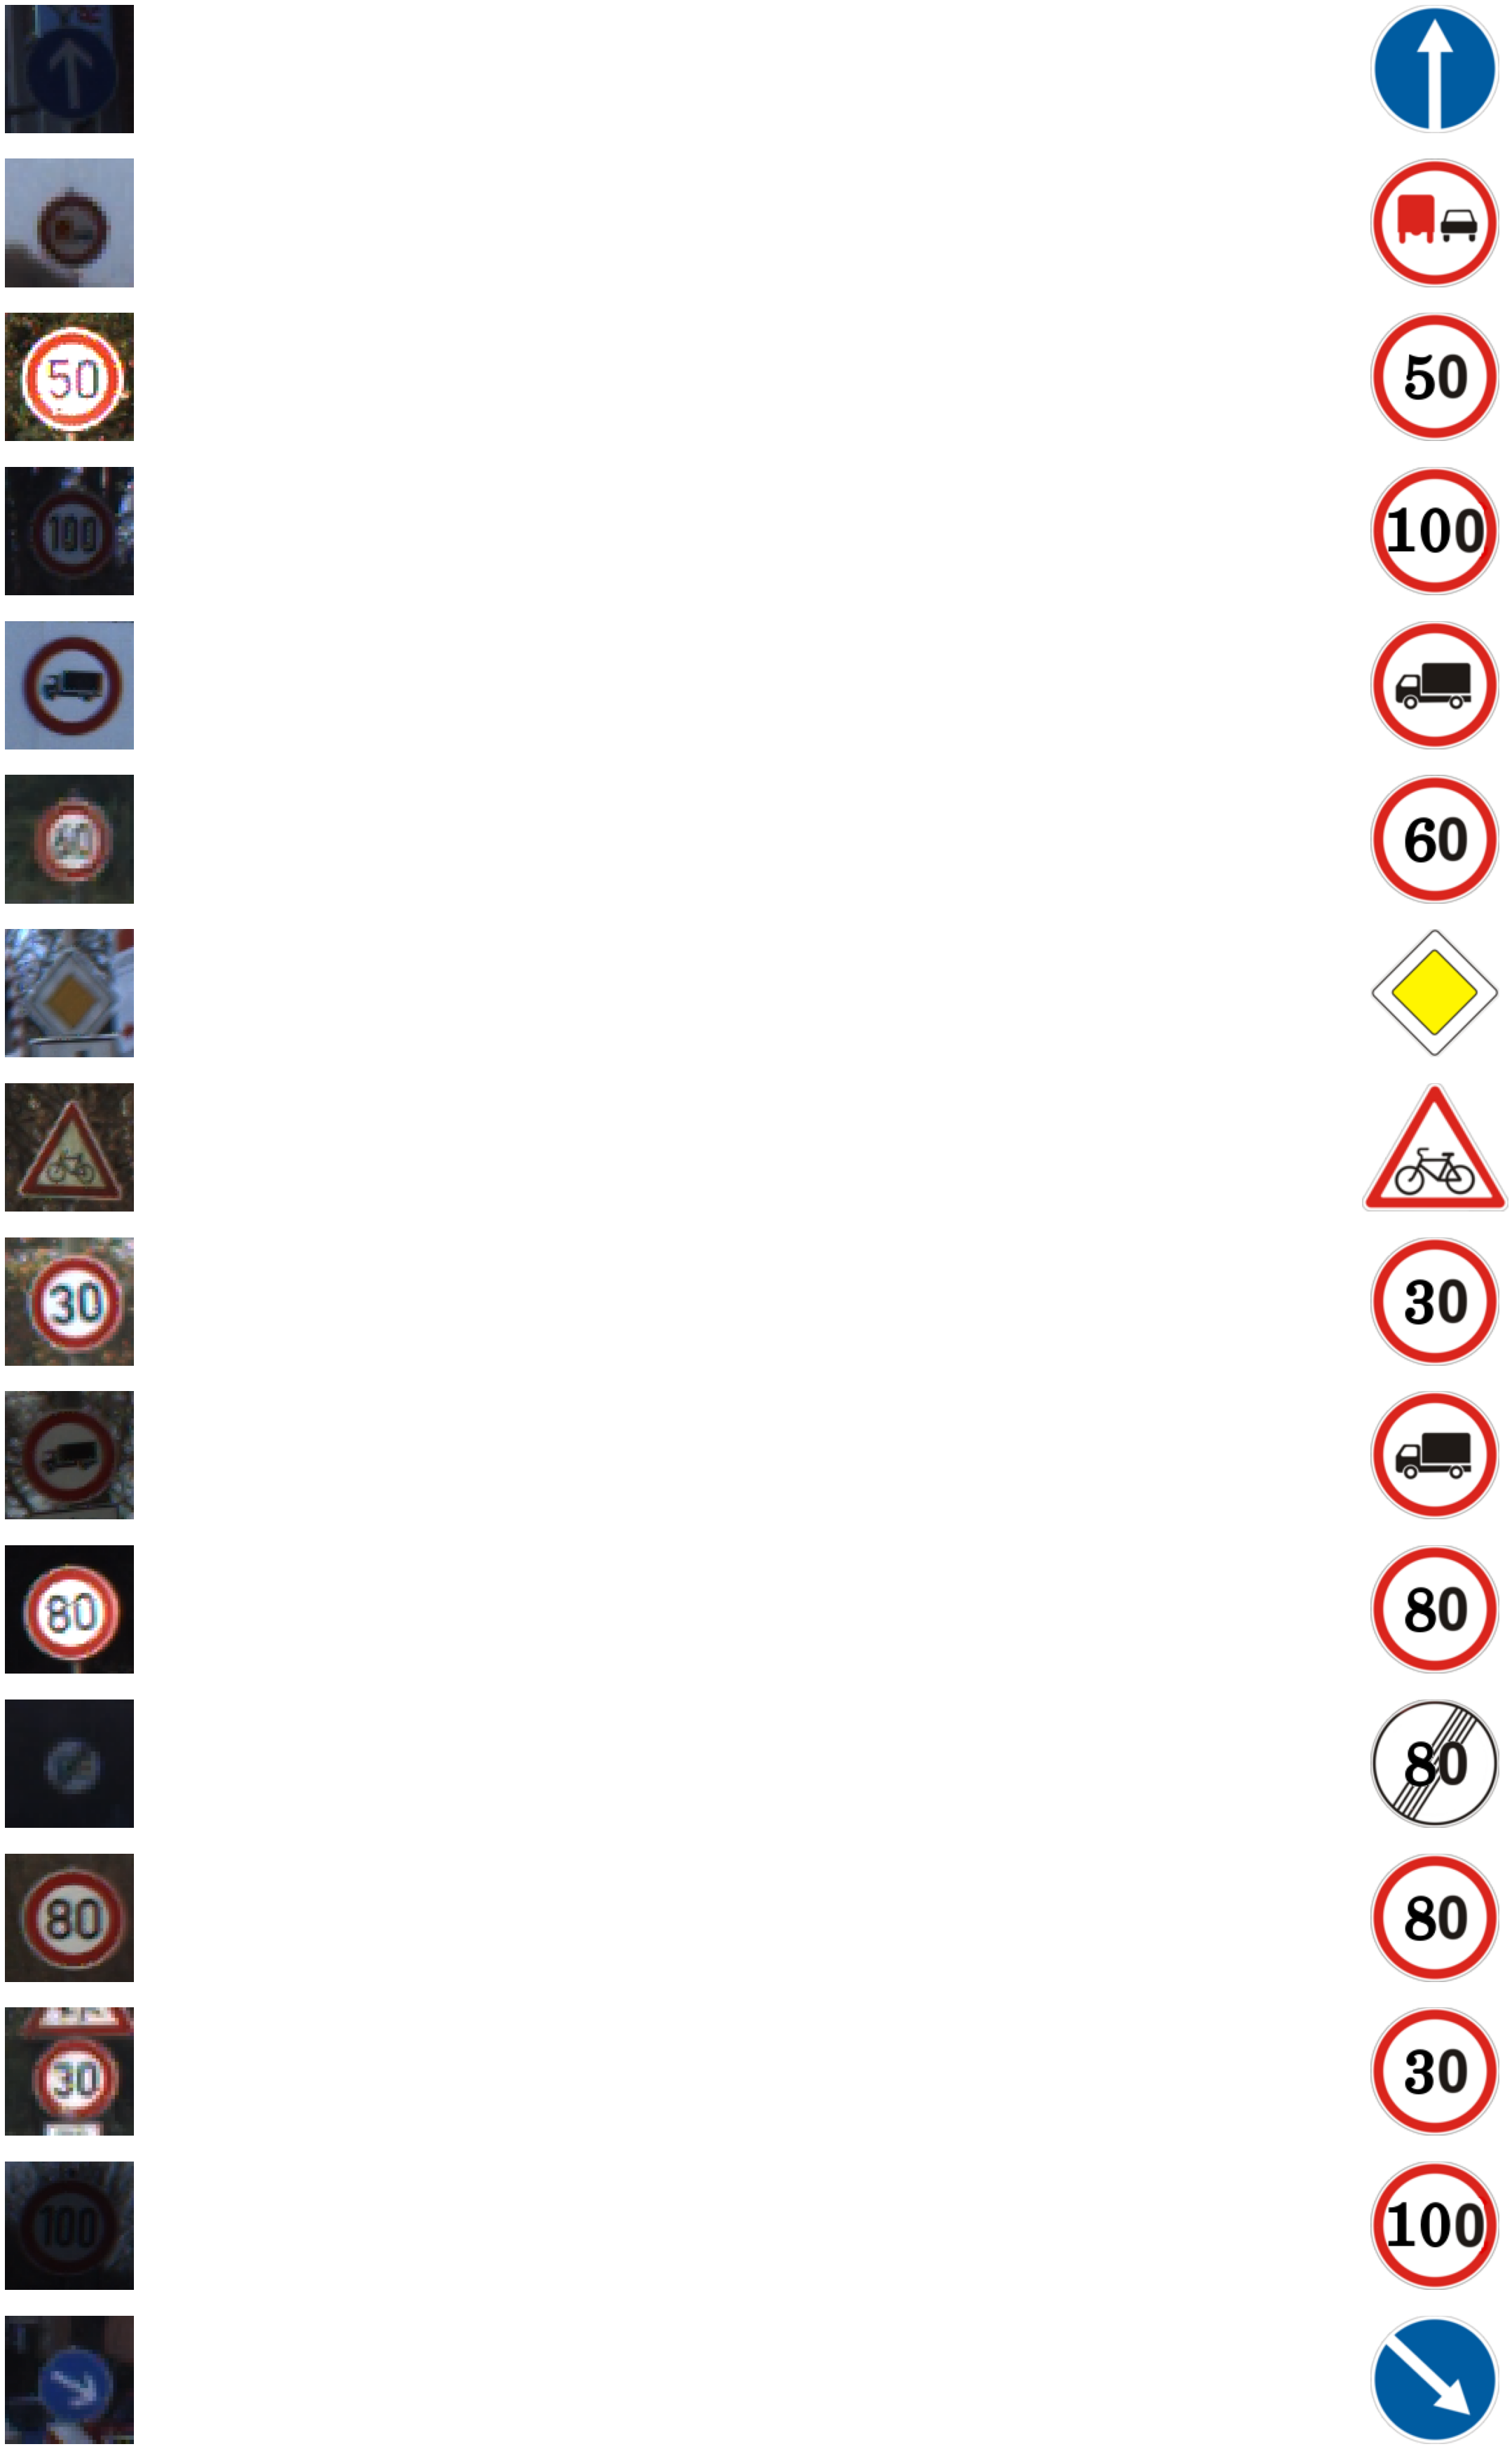

In [20]:
batch = 2
plt.figure(figsize=(64, 64))
plt.tight_layout()
for i in range(0, 16):
    plt.subplot(16, 2, 2 * i + 1), plt.axis('off')
    plt.imshow(generator_test[batch][0][i])
    pre = model.predict_classes(generator_test[batch][0])
    img = Image.open('../input/gtsrb-german-traffic-sign/Meta/' + str(pre[i]) + '.png')
    plt.subplot(16, 2, 2 * i + 2), plt.axis('off')
    plt.imshow(img)